In [1]:
%matplotlib inline

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

pd.set_option('display.max_rows', 12)
pd.set_option('display.float_format', '{:20,.3f}'.format)
plt.style.use('seaborn')

pattern = pd.read_csv('temp.csv', index_col=0)
pattern

isHit  isPattern  isDash  s_distance              s_delay  \
1         0          0       0         626                0.953   
2         1          0       0         529                0.552   
3         0          0       0        1029                0.343   
4         1          1       0        1464                0.659   
5         1          1       0         781                0.682   
...     ...        ...     ...         ...                  ...   
1450      1          0       1        1132                0.768   
1451      0          1       0         826                0.333   
1452      1          0       0         745                0.539   
1453      1          0       1         834                0.201   
1454      0          1       0         724                0.605   

                pre_delay             in_delay           post_delay  size  \
1                   0.320                0.312                0.517   274   
2                   0.606                0.539                0.322   242   
3                   0.264                0.241                0.375   210   
4                   0.108                0.764                0.162   268   
5                   0.252                0.114                0.103   189   
...                   ...                  ...                  ...   ...   
1450                0.632                0.494                0.350   215   
1451                0.368                0.792                0.188   187   
1452                0.234                0.835                0.415   190   
1453                0.167                0.220                0.319   189   
1454                0.206                0.432                0.171   209   

      pattern_num  count  
1               2      1  
2               2      6  
3               1      5  
4               3      4  
5               5      3  
...           ...    ...  
1450            3      8  
1451            4      7  
1452            2      6  
1453            1      5  
1454            5      4  

[1454 rows x 11 columns]

In [2]:
pattern.loc[:,'isHit':'count'].corr()

isHit            isPattern               isDash  \
isHit                      1.000               -0.025                0.051   
isPattern                 -0.025                1.000               -0.019   
isDash                     0.051               -0.019                1.000   
s_distance                 0.035               -0.035                0.022   
s_delay                   -0.062                0.016                0.018   
pre_delay                 -0.057                0.008               -0.030   
in_delay                  -0.079                0.027                0.015   
post_delay                -0.134               -0.025               -0.055   
size                       0.058                0.044                0.013   
pattern_num               -0.010               -0.026               -0.028   
count                      0.034                0.003                0.191   

                      s_distance              s_delay            pre_delay  \
isHit                      0.035               -0.062               -0.057   
isPattern                 -0.035                0.016                0.008   
isDash                     0.022                0.018               -0.030   
s_distance                 1.000                0.045               -0.051   
s_delay                    0.045                1.000               -0.023   
pre_delay                 -0.051               -0.023                1.000   
in_delay                  -0.010                0.011                0.220   
post_delay                 0.021                0.042                0.204   
size                      -0.036               -0.008                0.125   
pattern_num                0.004               -0.010                0.003   
count                      0.061               -0.000                0.001   

                        in_delay           post_delay                 size  \
isHit                     -0.079               -0.134                0.058   
isPattern                  0.027               -0.025                0.044   
isDash                     0.015               -0.055                0.013   
s_distance                -0.010                0.021               -0.036   
s_delay                    0.011                0.042               -0.008   
pre_delay                  0.220                0.204                0.125   
in_delay                   1.000                0.224                0.155   
post_delay                 0.224                1.000                0.117   
size                       0.155                0.117                1.000   
pattern_num               -0.004               -0.013               -0.156   
count                     -0.014               -0.034                0.002   

                     pattern_num                count  
isHit                     -0.010                0.034  
isPattern                 -0.026                0.003  
isDash                    -0.028                0.191  
s_distance                 0.004                0.061  
s_delay                   -0.010               -0.000  
pre_delay                  0.003                0.001  
in_delay                  -0.004               -0.014  
post_delay                -0.013               -0.034  
size                      -0.156                0.002  
pattern_num                1.000               -0.007  
count                     -0.007                1.000

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score

m1 = pd.DataFrame(confusion_matrix(pattern['isDash'], pattern['isHit']))
m1.columns.name = 'isHit'
m1.index.name = 'isDash'
m1

isHit     0    1
isDash          
0       462  470
1       231  291

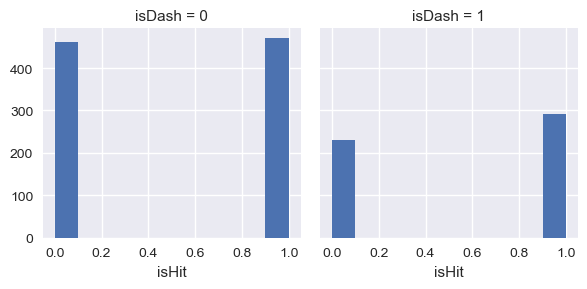

In [4]:
isHit = pd.DataFrame({'isDash': pattern['isDash'], 'isHit': pattern['isHit']})

g = sns.FacetGrid(isHit, col='isDash')
g.map(plt.hist, 'isHit')

In [5]:
m1 = pd.DataFrame(confusion_matrix(pattern['isPattern'], pattern['isHit']))
m1.columns.name = 'isHit'
m1.index.name = 'isPattern'
m1

isHit        0    1
isPattern          
0          334  386
1          359  375

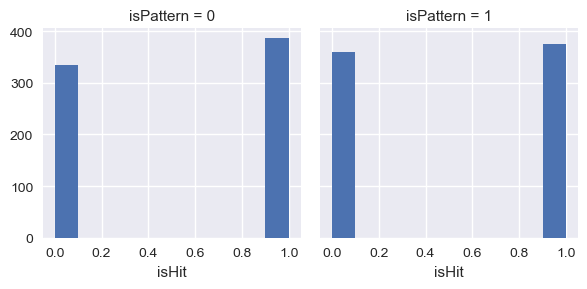

In [6]:
isHit = pd.DataFrame({'isPattern': pattern['isPattern'], 'isHit': pattern['isHit']})

g = sns.FacetGrid(isHit, col='isPattern')
g.map(plt.hist, 'isHit')

In [7]:
A = pd.DataFrame(pattern)
h0_A = A[A['isHit'] == 0]
h1_A = A[A['isHit'] == 1]

<AxesSubplot:xlabel='s_distance', ylabel='Count'>

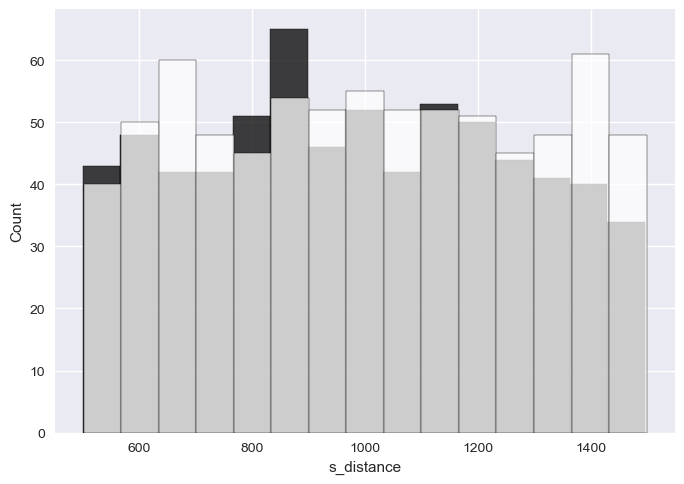

In [8]:
sns.histplot(x=h0_A['s_distance'], color='black', bins=15)
sns.histplot(x=h1_A['s_distance'], color='white', bins=15)

<AxesSubplot:xlabel='s_delay', ylabel='Count'>

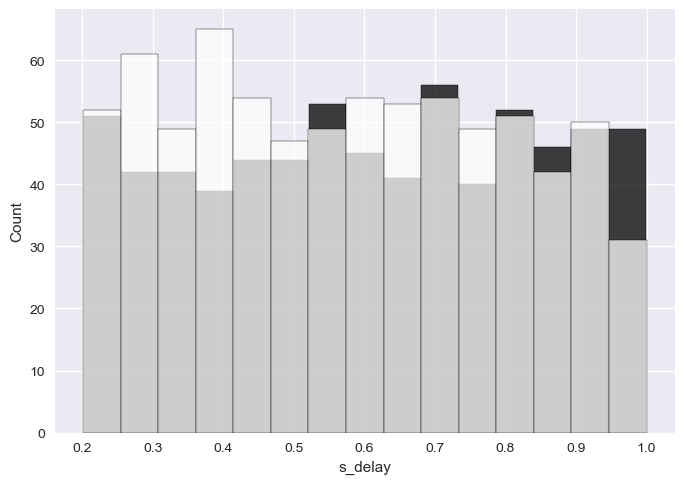

In [9]:
sns.histplot(x=h0_A['s_delay'], color='black', bins=15)
sns.histplot(x=h1_A['s_delay'], color='white', bins=15)

<AxesSubplot:xlabel='pre_delay', ylabel='Count'>

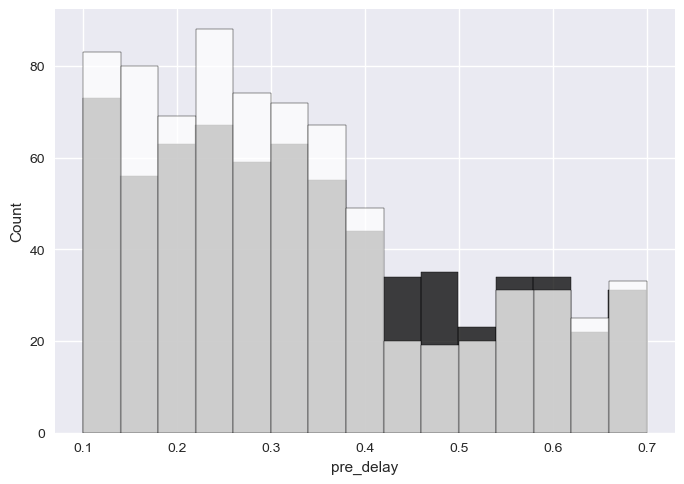

In [10]:
sns.histplot(x=h0_A['pre_delay'], color='black', bins=15)
sns.histplot(x=h1_A['pre_delay'], color='white', bins=15)

<AxesSubplot:xlabel='in_delay', ylabel='Count'>

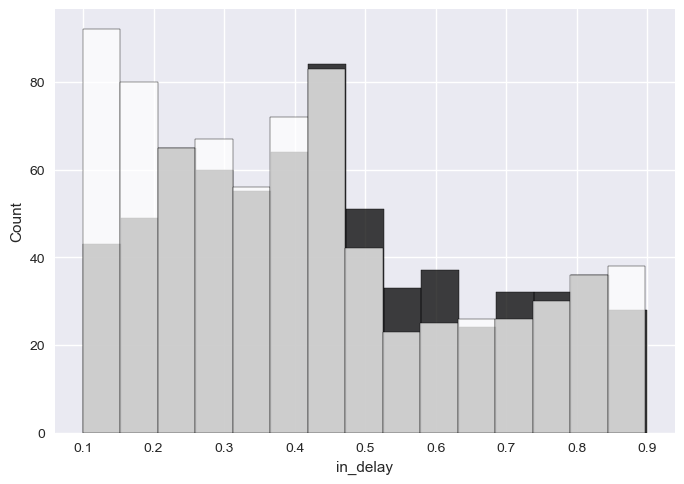

In [11]:
sns.histplot(x=h0_A['in_delay'], color='black', bins=15)
sns.histplot(x=h1_A['in_delay'], color='white', bins=15)

<AxesSubplot:xlabel='post_delay', ylabel='Count'>

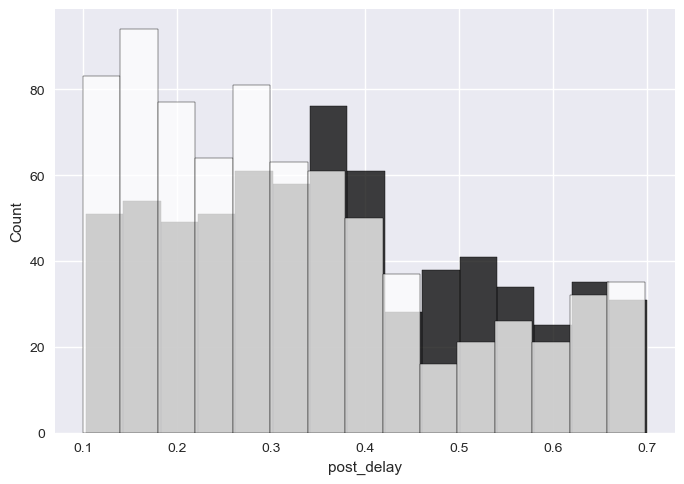

In [12]:
sns.histplot(x=h0_A['post_delay'], color='black', bins=15)
sns.histplot(x=h1_A['post_delay'], color='white', bins=15)

In [13]:
pattern['total_delay'] = pattern['pre_delay'] + pattern['in_delay'] + pattern['post_delay']

B = pd.DataFrame(pattern)

h0_B = B[B['isHit'] == 0]
h1_B = B[B['isHit'] == 1]

<AxesSubplot:xlabel='total_delay', ylabel='Count'>

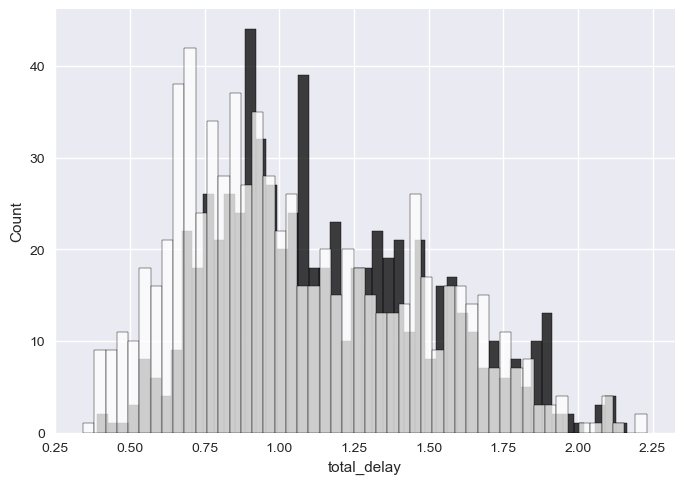

In [14]:
sns.histplot(x=h0_B['total_delay'], color='black', bins=50)
sns.histplot(x=h1_B['total_delay'], color='white', bins=50)

<AxesSubplot:xlabel='size', ylabel='Count'>

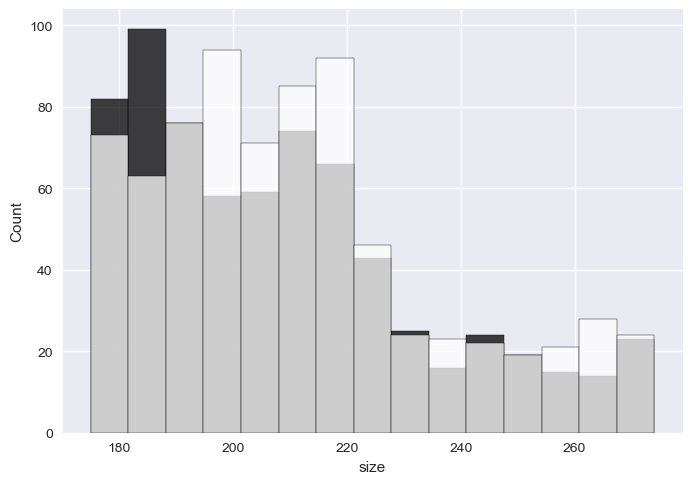

In [15]:
sns.histplot(x=h0_A['size'], color='black', bins=15)
sns.histplot(x=h1_A['size'], color='white', bins=15)

<AxesSubplot:xlabel='pattern_num', ylabel='Count'>

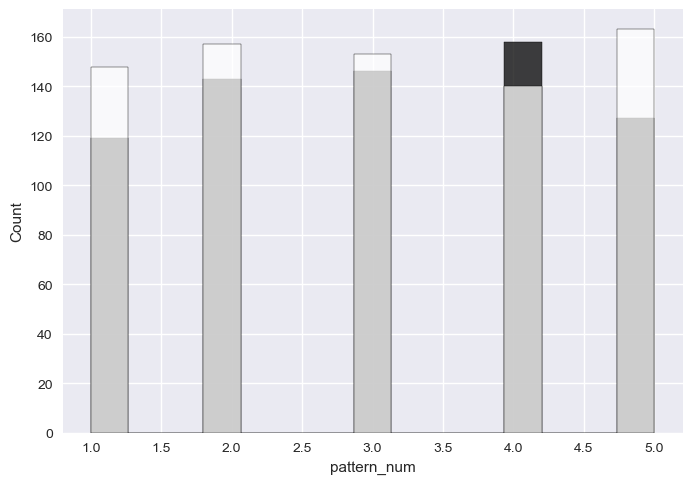

In [16]:
sns.histplot(x=h0_A['pattern_num'], color='black', bins=15)
sns.histplot(x=h1_A['pattern_num'], color='white', bins=15)

<AxesSubplot:xlabel='count', ylabel='Count'>

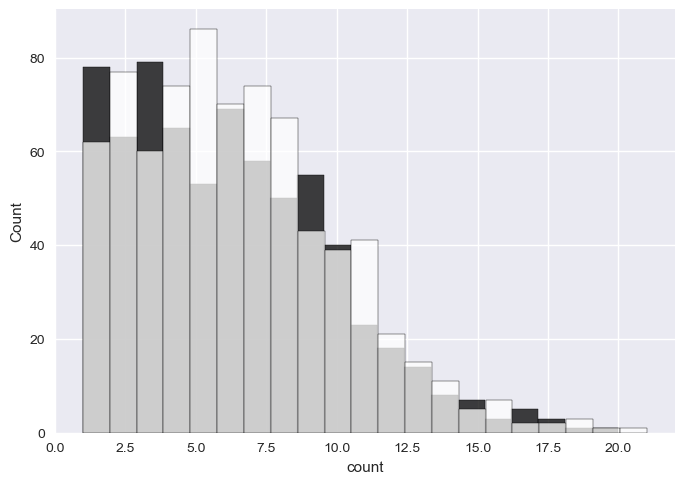

In [17]:
sns.histplot(x=h0_A['count'], color='black', bins=20)
sns.histplot(x=h1_A['count'], color='white', bins=21)

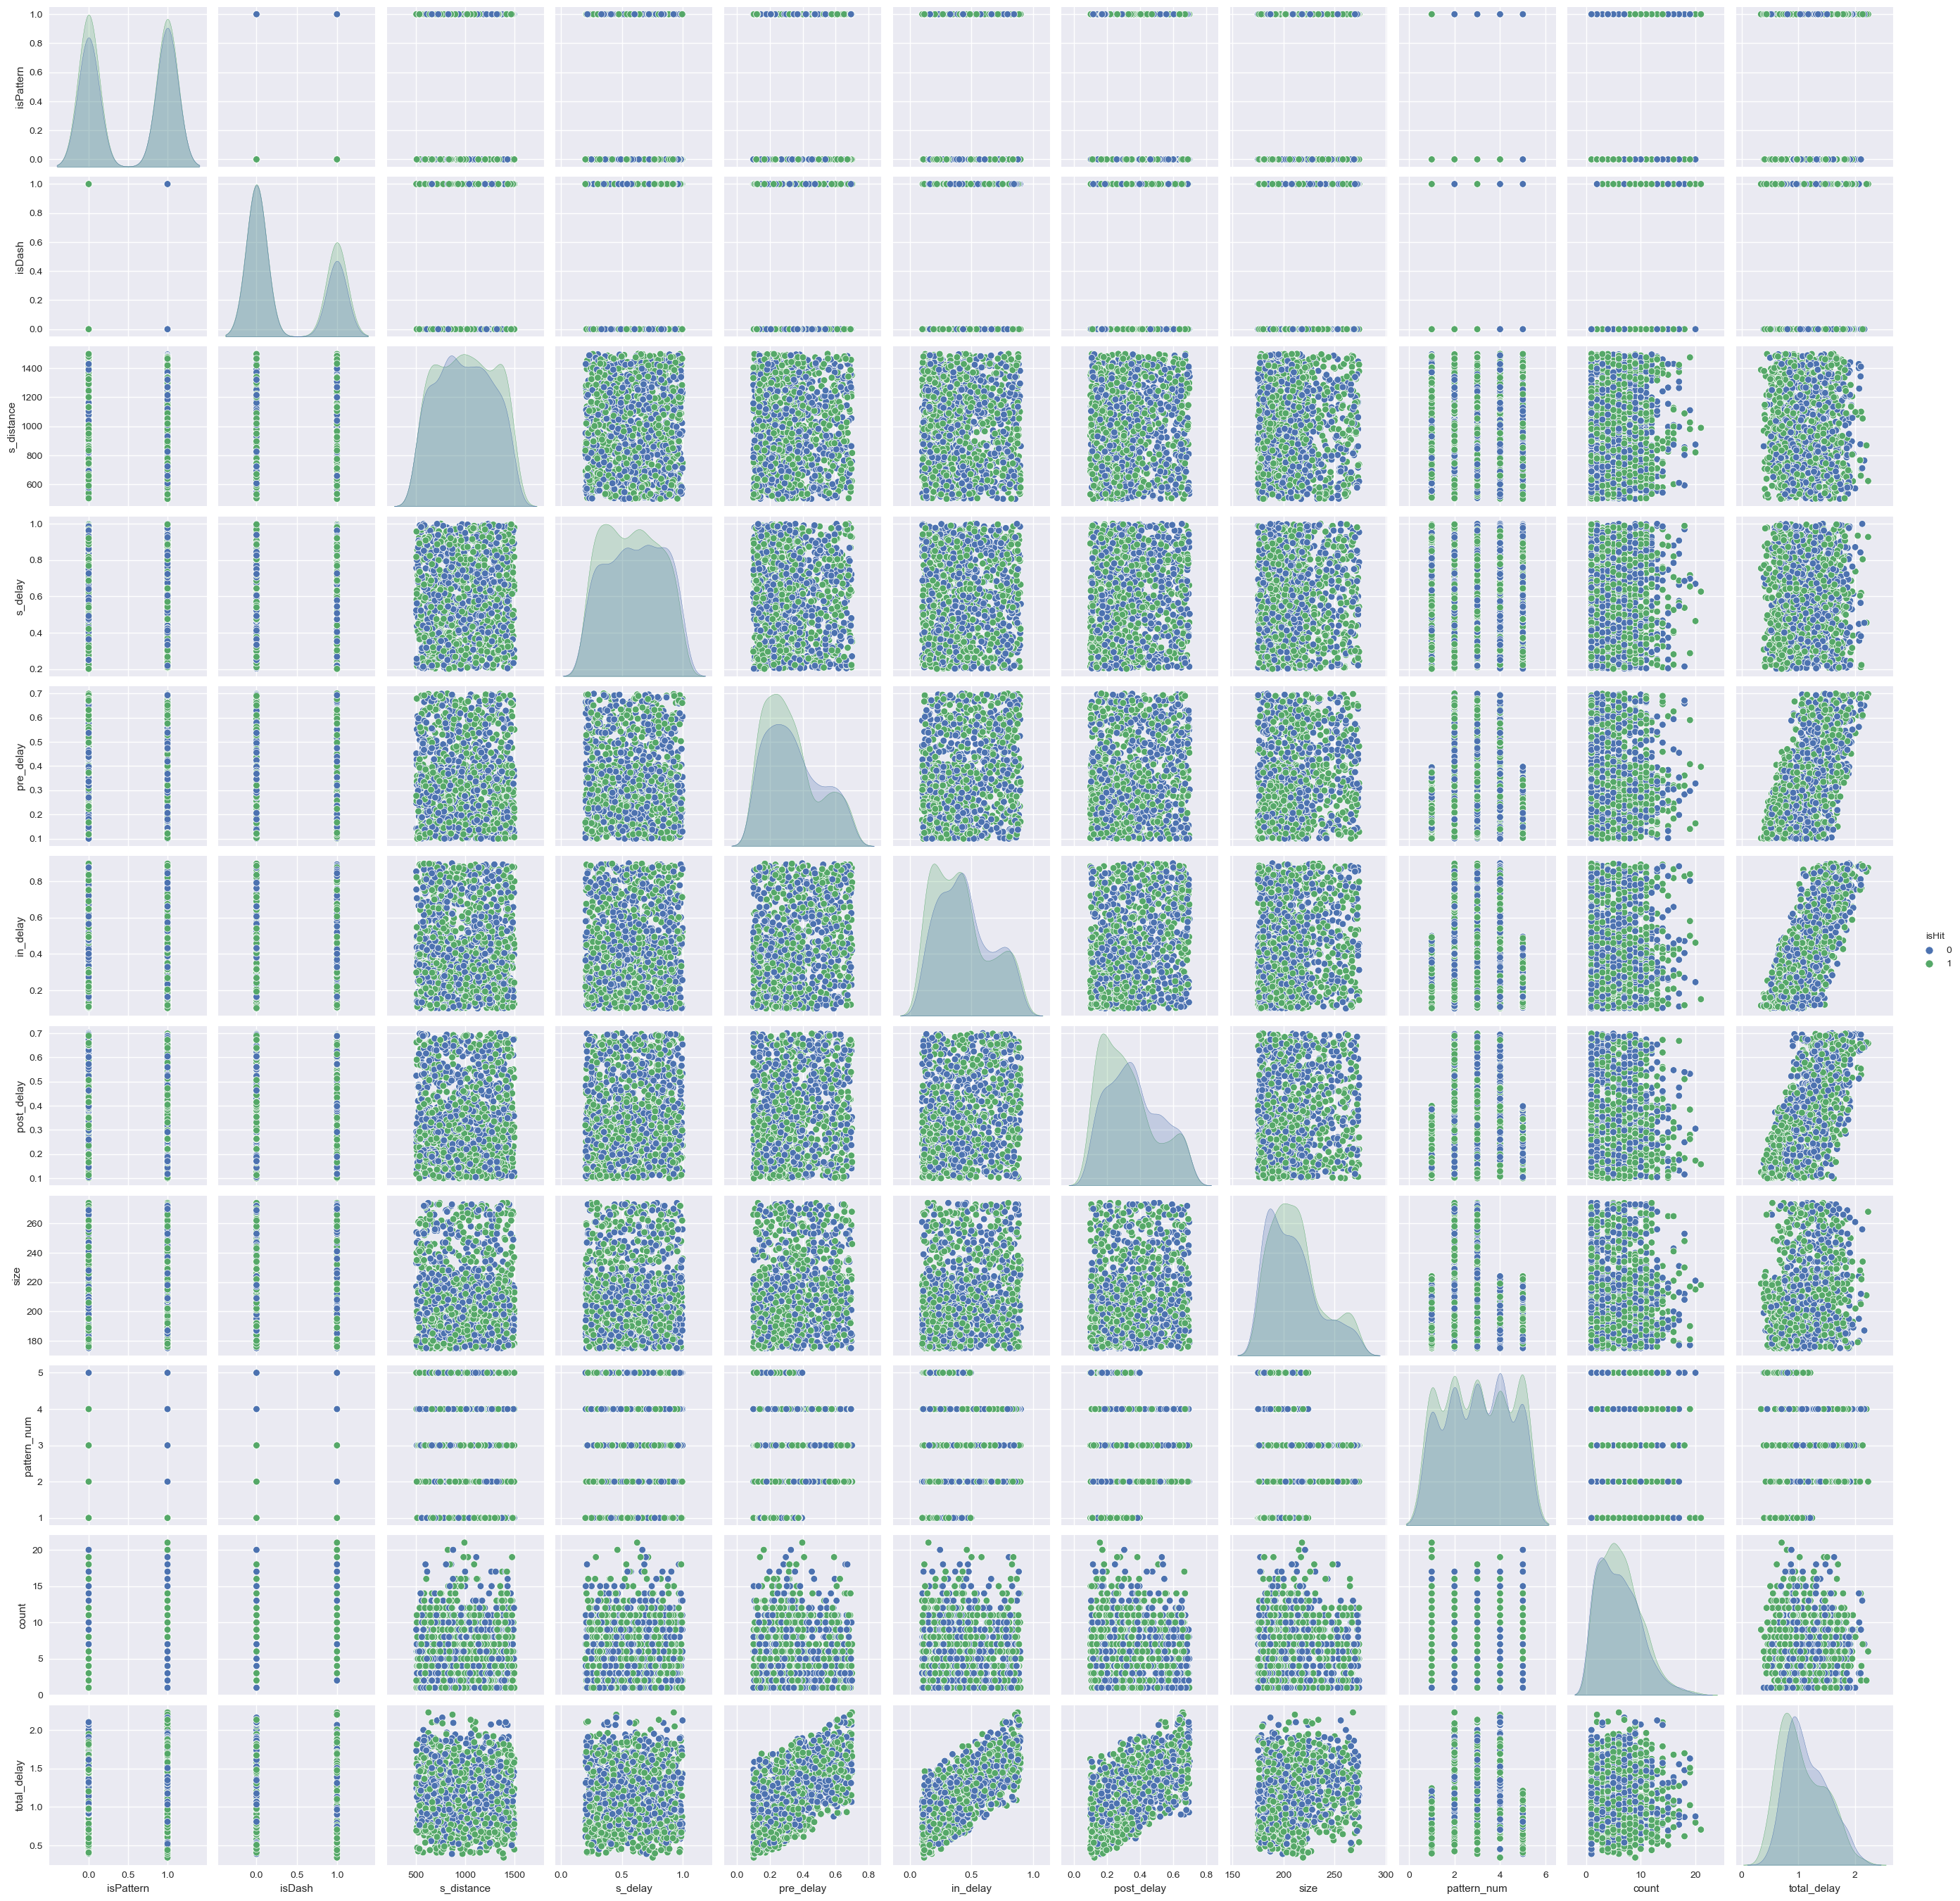

In [18]:
sns.pairplot(pattern, hue='isHit')

<AxesSubplot:xlabel='isDash'>

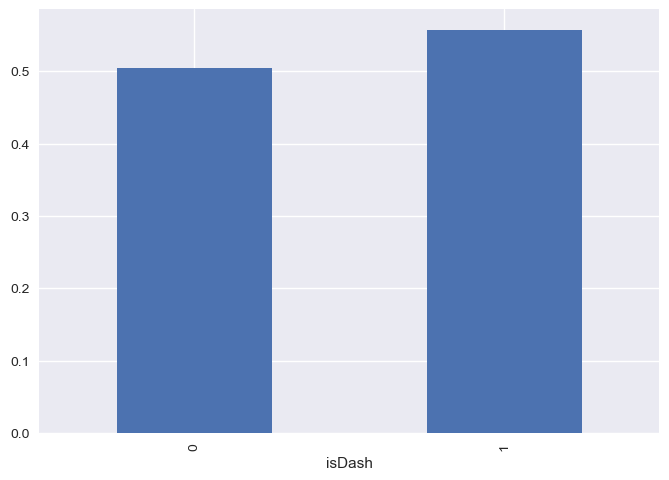

In [19]:
temp = pd.read_csv('temp.csv', index_col=0)

p = temp.groupby('isDash')['isHit'].mean()

p.plot(kind='bar')

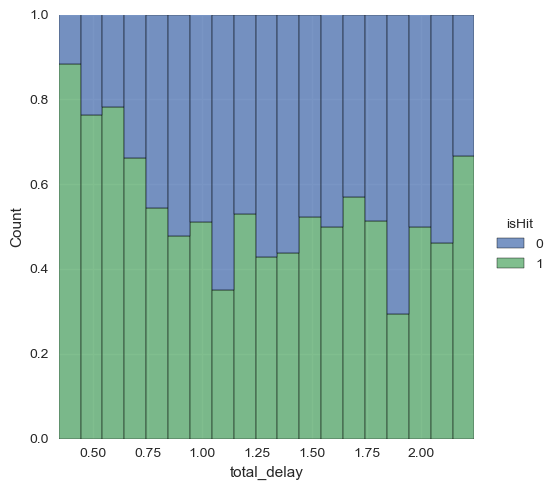

In [20]:
sns.displot(data=pattern, x='total_delay', hue='isHit', multiple='fill', binwidth=0.1)

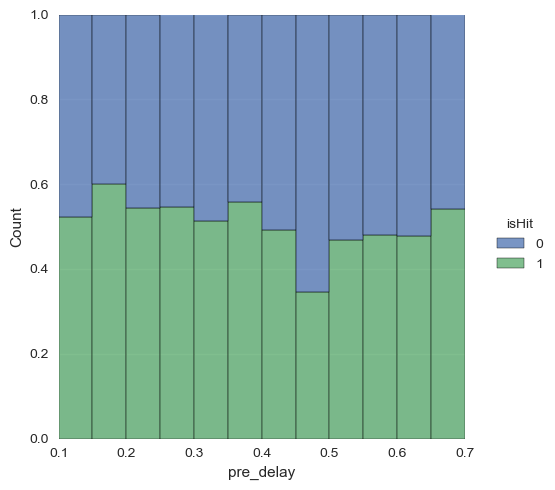

In [21]:
sns.displot(data=pattern, x='pre_delay', hue='isHit', multiple='fill', binwidth=0.05)

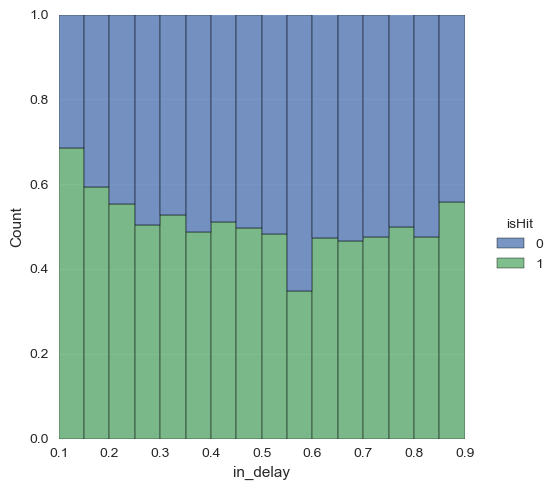

In [22]:
sns.displot(data=pattern, x='in_delay', hue='isHit', multiple='fill', binwidth=0.05)

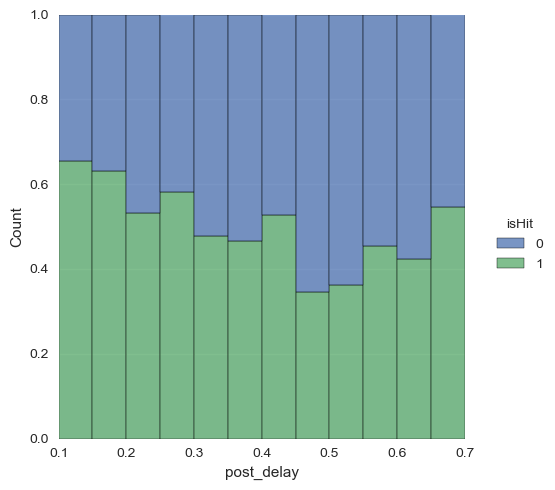

In [23]:
sns.displot(data=pattern, x='post_delay', hue='isHit', multiple='fill', binwidth=0.05)

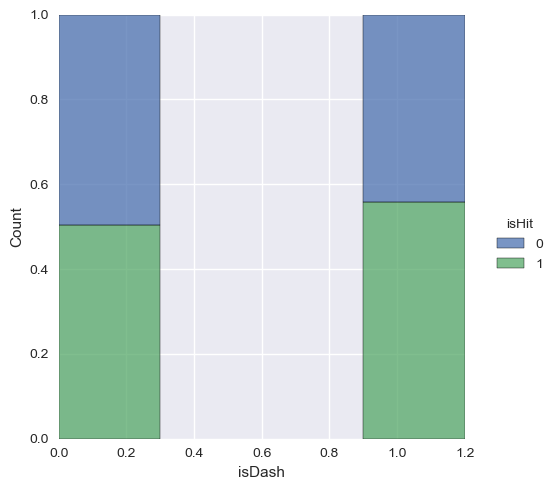

In [24]:
sns.displot(data=pattern, x='isDash', hue='isHit', multiple='fill', binwidth=0.3)

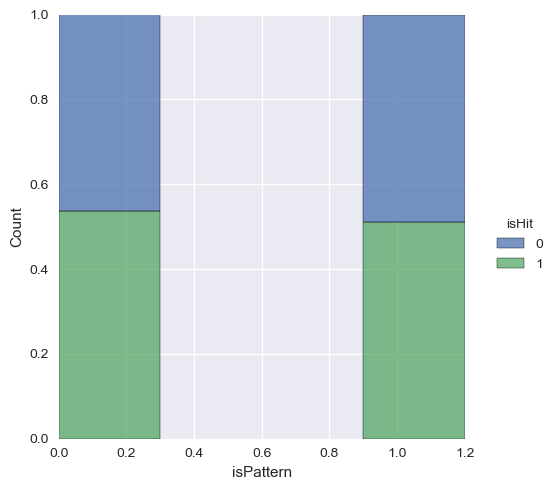

In [25]:
sns.displot(data=pattern, x='isPattern', hue='isHit', multiple='fill', binwidth=0.3)

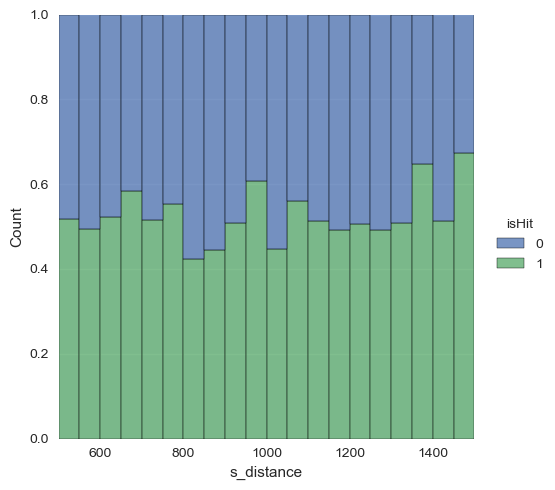

In [26]:
sns.displot(data=pattern, x='s_distance', hue='isHit', multiple='fill', binwidth=50)

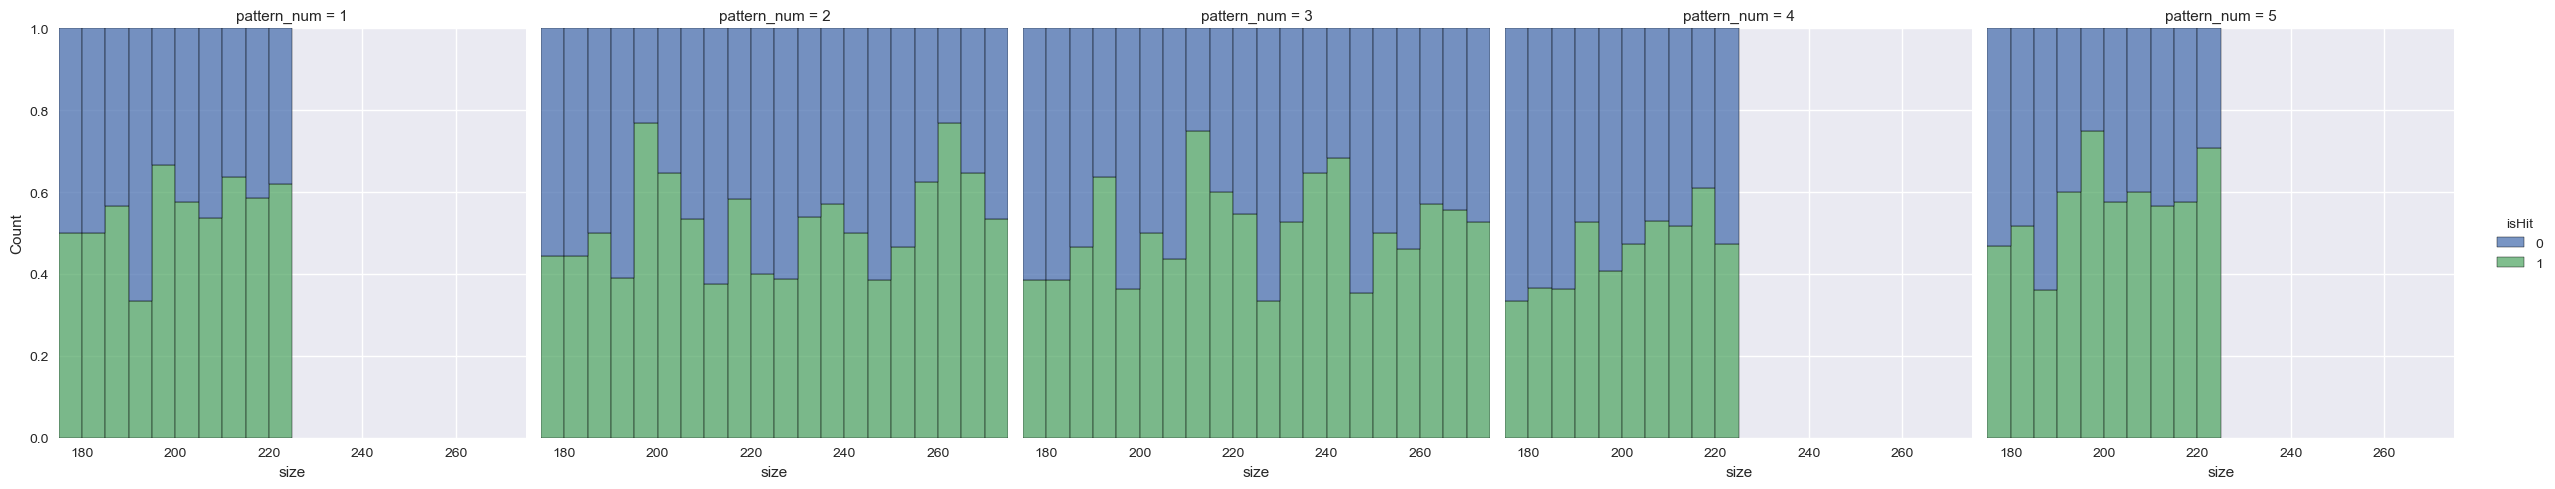

In [27]:
sns.displot(data=pattern, x='size', hue='isHit', multiple='fill', binwidth=5, col='pattern_num')

In [28]:
big_pattern = pattern[pattern['pattern_num'].isin([2, 3, 4])]
small_pattern = pattern[pattern['pattern_num'].isin([1, 5])]

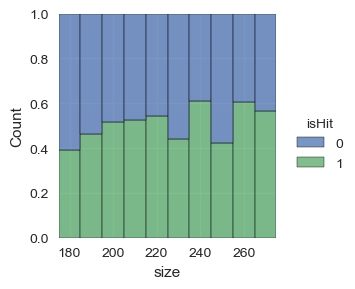

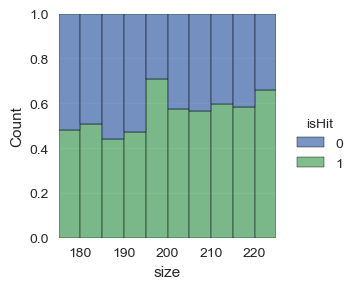

In [29]:
sns.displot(data=big_pattern, x='size', hue='isHit', multiple='fill', binwidth=10, height=3)
sns.displot(data=small_pattern, x='size', hue='isHit', multiple='fill', binwidth=5, height=3)

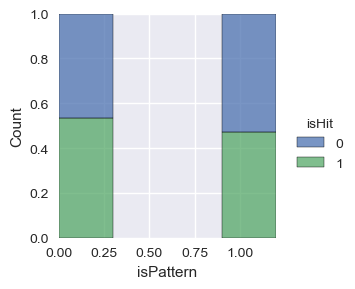

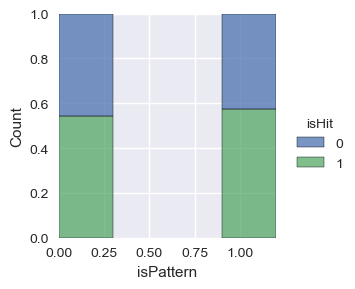

In [30]:
sns.displot(data=big_pattern, x='isPattern', hue='isHit', multiple='fill', binwidth=0.3, height=3)
sns.displot(data=small_pattern, x='isPattern', hue='isHit', multiple='fill', binwidth=0.3, height=3)

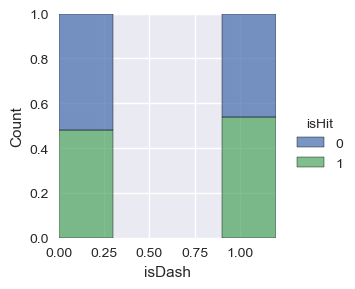

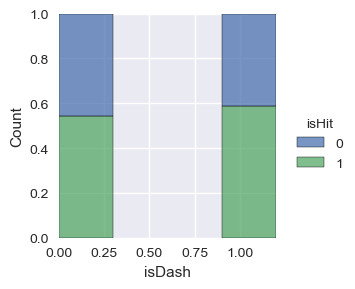

In [31]:
sns.displot(data=big_pattern, x='isDash', hue='isHit', multiple='fill', binwidth=0.3, height=3)
sns.displot(data=small_pattern, x='isDash', hue='isHit', multiple='fill', binwidth=0.3, height=3)

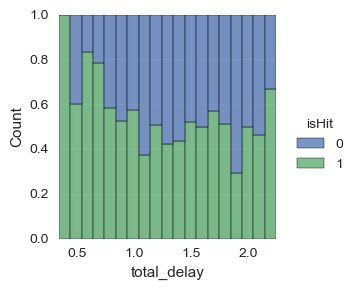

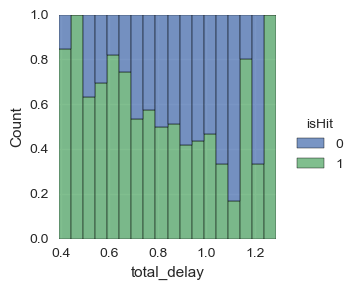

In [32]:
sns.displot(data=big_pattern, x='total_delay', hue='isHit', multiple='fill', binwidth=0.1, height=3)
sns.displot(data=small_pattern, x='total_delay', hue='isHit', multiple='fill', binwidth=0.05, height=3)

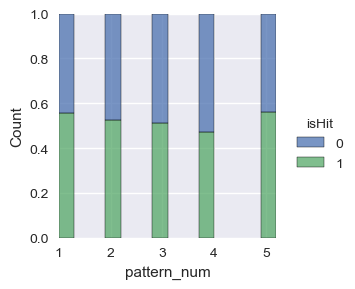

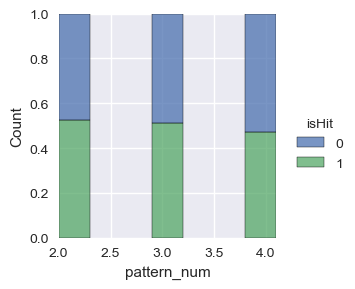

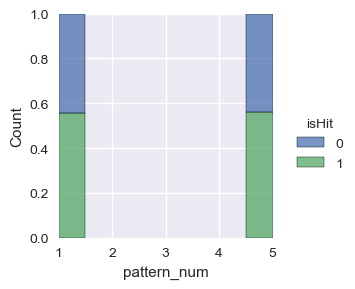

In [33]:
sns.displot(data=pattern, x='pattern_num', hue='isHit', multiple='fill', binwidth=0.3, height=3)
sns.displot(data=big_pattern, x='pattern_num', hue='isHit', multiple='fill', binwidth=0.3, height=3)
sns.displot(data=small_pattern, x='pattern_num', hue='isHit', multiple='fill', binwidth=0.5, height=3)

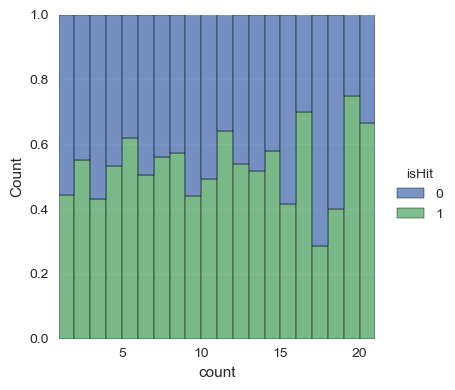

In [34]:
sns.displot(data=pattern, x='count', hue='isHit', multiple='fill', binwidth=1, height=4)

In [35]:
import statsmodels.api as sm

X = pattern.loc[:,'pre_delay':'post_delay']
y = pattern.isHit

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.691321
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  isHit   No. Observations:                 1454
Model:                          Logit   Df Residuals:                     1451
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 May 2023   Pseudo R-squ.:                0.001058
Time:                        11:30:31   Log-Likelihood:                -1005.2
converged:                       True   LL-Null:                       -1006.2
Covariance Type:            nonrobust   LLR p-value:                    0.3449
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pre_delay      0.5267      0.298      1.770      0.077      -0.057       1.110
in_delay       0.0967      0.228      0.425      0.671      -0.350       0.543
post_delay    -0.6230      0.294     -2.117      0.034      -1.200      -0.046
==============================================================================
"""

In [36]:
X = pattern.loc[:,'total_delay']
y = pattern.isHit

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.693144
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  isHit   No. Observations:                 1454
Model:                          Logit   Df Residuals:                     1453
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 May 2023   Pseudo R-squ.:               -0.001576
Time:                        11:30:31   Log-Likelihood:                -1007.8
converged:                       True   LL-Null:                       -1006.2
Covariance Type:            nonrobust   LLR p-value:                       nan
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
total_delay     0.0042      0.045      0.094      0.925      -0.084       0.092
===============================================================================
"""

In [37]:
X = pattern.loc[:,'post_delay']
y = pattern.isHit

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.693023
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  isHit   No. Observations:                 1454
Model:                          Logit   Df Residuals:                     1453
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 May 2023   Pseudo R-squ.:               -0.001401
Time:                        11:30:31   Log-Likelihood:                -1007.7
converged:                       True   LL-Null:                       -1006.2
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
post_delay    -0.0828      0.138     -0.602      0.547      -0.352       0.187
==============================================================================
"""

In [38]:
X = pattern.loc[:,'isDash']
y = pattern.isHit

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.690770
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  isHit   No. Observations:                 1454
Model:                          Logit   Df Residuals:                     1453
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 May 2023   Pseudo R-squ.:                0.001854
Time:                        11:30:31   Log-Likelihood:                -1004.4
converged:                       True   LL-Null:                       -1006.2
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
isDash         0.2309      0.088      2.620      0.009       0.058       0.404
==============================================================================
"""

In [39]:
X = pattern.loc[:,'isPattern']
y = pattern.isHit

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.693027
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  isHit   No. Observations:                 1454
Model:                          Logit   Df Residuals:                     1453
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 May 2023   Pseudo R-squ.:               -0.001407
Time:                        11:30:31   Log-Likelihood:                -1007.7
converged:                       True   LL-Null:                       -1006.2
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
isPattern      0.0436      0.074      0.591      0.555      -0.101       0.188
==============================================================================
"""

In [40]:
X = big_pattern.loc[:,'isPattern']
y = big_pattern.isHit

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.692324
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  isHit   No. Observations:                  897
Model:                          Logit   Df Residuals:                      896
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 May 2023   Pseudo R-squ.:                0.001180
Time:                        11:30:31   Log-Likelihood:                -621.01
converged:                       True   LL-Null:                       -621.75
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
isPattern     -0.1137      0.094     -1.214      0.225      -0.297       0.070
==============================================================================
"""

In [41]:
X = small_pattern.loc[:,'isPattern']
y = small_pattern.isHit

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.687388
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  isHit   No. Observations:                  557
Model:                          Logit   Df Residuals:                      556
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 May 2023   Pseudo R-squ.:               -0.001552
Time:                        11:30:31   Log-Likelihood:                -382.87
converged:                       True   LL-Null:                       -382.28
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
isPattern      0.3067      0.122      2.518      0.012       0.068       0.545
==============================================================================
"""

In [42]:
X = big_pattern.loc[:,'size']
y = big_pattern.isHit

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.693055
         Iterations 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  isHit   No. Observations:                  897
Model:                          Logit   Df Residuals:                      896
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 May 2023   Pseudo R-squ.:               0.0001245
Time:                        11:30:31   Log-Likelihood:                -621.67
converged:                       True   LL-Null:                       -621.75
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
size           0.0001      0.000      0.406      0.685      -0.000       0.001
==============================================================================
"""

In [43]:
X = small_pattern.loc[:,'size']
y = small_pattern.isHit

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.685485
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  isHit   No. Observations:                  557
Model:                          Logit   Df Residuals:                      556
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 May 2023   Pseudo R-squ.:                0.001221
Time:                        11:30:31   Log-Likelihood:                -381.82
converged:                       True   LL-Null:                       -382.28
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
size           0.0012      0.000      2.910      0.004       0.000       0.002
==============================================================================
"""

In [44]:
X = pattern.loc[:,'size']
y = pattern.isHit

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.691724
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  isHit   No. Observations:                 1454
Model:                          Logit   Df Residuals:                     1453
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 May 2023   Pseudo R-squ.:               0.0004752
Time:                        11:30:31   Log-Likelihood:                -1005.8
converged:                       True   LL-Null:                       -1006.2
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
size           0.0005      0.000      2.033      0.042     1.8e-05       0.001
==============================================================================
"""

In [45]:
BBig_pattern = pattern[pattern['pattern_num'].isin([2, 3])]

In [46]:
X = BBig_pattern.loc[:,'size']
y = BBig_pattern.isHit

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.692253
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  isHit   No. Observations:                  599
Model:                          Logit   Df Residuals:                      598
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 May 2023   Pseudo R-squ.:               0.0004036
Time:                        11:30:31   Log-Likelihood:                -414.66
converged:                       True   LL-Null:                       -414.83
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
size           0.0004      0.000      1.034      0.301      -0.000       0.001
==============================================================================
"""

In [47]:
X = pattern.loc[:,'isPattern':]
y = pattern.isHit

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.674188
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  isHit   No. Observations:                 1454
Model:                          Logit   Df Residuals:                     1444
Method:                           MLE   Df Model:                            9
Date:                Fri, 19 May 2023   Pseudo R-squ.:                 0.02582
Time:                        11:30:31   Log-Likelihood:                -980.27
converged:                       True   LL-Null:                       -1006.2
Covariance Type:            nonrobust   LLR p-value:                 4.613e-08
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
isPattern      -0.1223      0.107     -1.143      0.253      -0.332       0.087
isDash          0.1664      0.114      1.460      0.144      -0.057       0.390
s_distance      0.0002      0.000      1.208      0.227      -0.000       0.001
s_delay        -0.5836      0.229     -2.554      0.011      -1.032      -0.136
pre_delay       0.2346    3.5e+06   6.71e-08      1.000   -6.85e+06    6.85e+06
in_delay        0.0751    3.5e+06   2.15e-08      1.000   -6.85e+06    6.85e+06
post_delay     -0.9299    3.5e+06  -2.66e-07      1.000   -6.85e+06    6.85e+06
size            0.0053      0.001      4.096      0.000       0.003       0.008
pattern_num    -0.0114      0.037     -0.312      0.755      -0.083       0.060
count           0.0084      0.014      0.584      0.559      -0.020       0.036
total_delay    -0.6203    3.5e+06  -1.77e-07      1.000   -6.85e+06    6.85e+06
===============================================================================
"""

In [48]:
X = pattern.loc[:,'post_delay']
y = pattern.isHit

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.693023
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  isHit   No. Observations:                 1454
Model:                          Logit   Df Residuals:                     1453
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 May 2023   Pseudo R-squ.:               -0.001401
Time:                        11:30:31   Log-Likelihood:                -1007.7
converged:                       True   LL-Null:                       -1006.2
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
post_delay    -0.0828      0.138     -0.602      0.547      -0.352       0.187
==============================================================================
"""

In [49]:
X = pattern.loc[:,'s_delay']
y = pattern.isHit

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.692916
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  isHit   No. Observations:                 1454
Model:                          Logit   Df Residuals:                     1453
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 May 2023   Pseudo R-squ.:               -0.001246
Time:                        11:30:31   Log-Likelihood:                -1007.5
converged:                       True   LL-Null:                       -1006.2
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s_delay        0.0678      0.083      0.821      0.412      -0.094       0.230
==============================================================================
"""

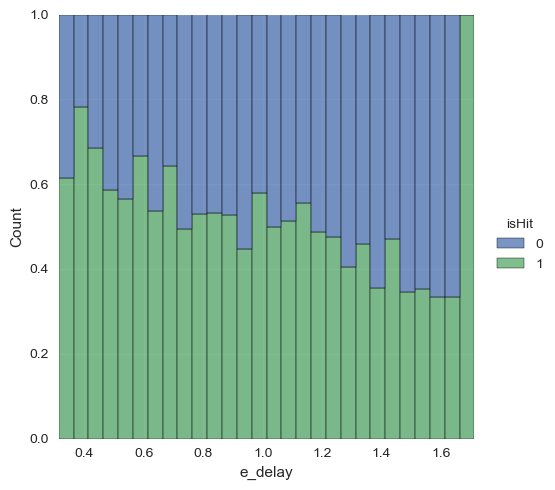

In [50]:
pattern['e_delay'] = pattern['s_delay'] + pattern['post_delay']

sns.displot(data=pattern, x='e_delay', hue='isHit', multiple='fill', binwidth=0.05)

In [69]:
count = len(pattern[pattern['e_delay'] >= 1.60])
print("e_delay > 1.65 = ", count)
count = len(pattern[pattern['e_delay'] < 1.60])
print("e_delay <= 1.65 = ", count)

e_delay > 1.65 =  5
e_delay <= 1.65 =  1449


In [51]:
X = pattern.loc[:,'isPattern':]
X = X.drop('pattern_num', axis=1)
X = X.drop('total_delay', axis=1)
X = X.drop('e_delay', axis=1)
y = pattern.isHit

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.674221
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  isHit   No. Observations:                 1454
Model:                          Logit   Df Residuals:                     1445
Method:                           MLE   Df Model:                            8
Date:                Fri, 19 May 2023   Pseudo R-squ.:                 0.02577
Time:                        11:30:32   Log-Likelihood:                -980.32
converged:                       True   LL-Null:                       -1006.2
Covariance Type:            nonrobust   LLR p-value:                 1.794e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
isPattern     -0.1225      0.107     -1.146      0.252      -0.332       0.087
isDash         0.1668      0.114      1.464      0.143      -0.056       0.390
s_distance     0.0002      0.000      1.177      0.239      -0.000       0.001
s_delay       -0.5891      0.228     -2.585      0.010      -1.036      -0.143
pre_delay     -0.3910      0.338     -1.157      0.247      -1.053       0.271
in_delay      -0.5471      0.255     -2.149      0.032      -1.046      -0.048
post_delay    -1.5521      0.341     -4.557      0.000      -2.220      -0.885
size           0.0052      0.001      4.131      0.000       0.003       0.008
count          0.0082      0.014      0.571      0.568      -0.020       0.036
==============================================================================
"""

In [52]:
X = X.drop('count', axis=1)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.674333
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  isHit   No. Observations:                 1454
Model:                          Logit   Df Residuals:                     1446
Method:                           MLE   Df Model:                            7
Date:                Fri, 19 May 2023   Pseudo R-squ.:                 0.02560
Time:                        11:36:28   Log-Likelihood:                -980.48
converged:                       True   LL-Null:                       -1006.2
Covariance Type:            nonrobust   LLR p-value:                 7.228e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
isPattern     -0.1213      0.107     -1.135      0.256      -0.331       0.088
isDash         0.1796      0.112      1.607      0.108      -0.039       0.399
s_distance     0.0002      0.000      1.254      0.210      -0.000       0.001
s_delay       -0.5854      0.228     -2.570      0.010      -1.032      -0.139
pre_delay     -0.3852      0.338     -1.140      0.254      -1.047       0.277
in_delay      -0.5487      0.254     -2.156      0.031      -1.047      -0.050
post_delay    -1.5550      0.341     -4.566      0.000      -2.223      -0.887
size           0.0053      0.001      4.329      0.000       0.003       0.008
==============================================================================
"""

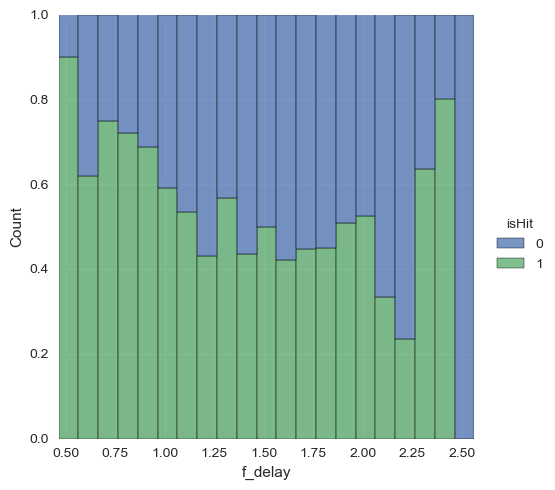

In [54]:
pattern['f_delay'] = pattern['s_delay'] + pattern['in_delay'] + pattern['post_delay']

sns.displot(data=pattern, x='f_delay', hue='isHit', multiple='fill', binwidth=0.1)

In [57]:
count = len(pattern[pattern['f_delay'] > 2.25])
print("f_delay > 2.25 = ", count)
count = len(pattern[pattern['f_delay'] <= 2.25])
print("f_delay <= 2.25 = ", count)

f_delay > 2.25 =  17
f_delay <= 2.25 =  1437


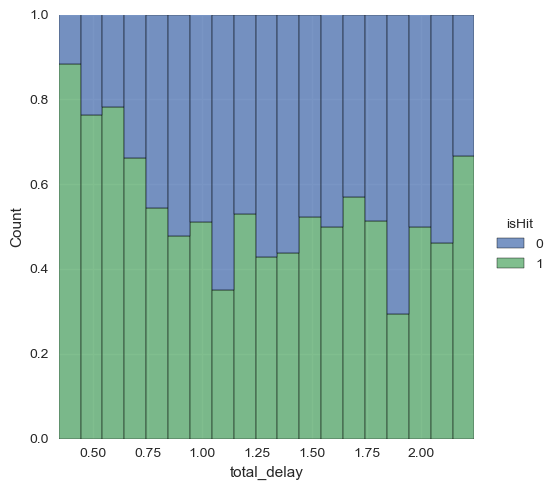

In [61]:
pattern['total_delay'] = pattern['pre_delay'] + pattern['in_delay'] + pattern['post_delay']

sns.displot(data=pattern, x='total_delay', hue='isHit', multiple='fill', binwidth=0.1)

In [62]:
count = len(pattern[pattern['total_delay'] > 1.1])
print("total_delay > 1.1 = ", count)
count = len(pattern[pattern['total_delay'] <= 1.1])
print("total_delay <= 1.1 = ", count)

total_delay > 1.1 =  643
total_delay <= 1.1 =  811


In [65]:

logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.673991
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  isHit   No. Observations:                 1454
Model:                          Logit   Df Residuals:                     1445
Method:                           MLE   Df Model:                            8
Date:                Fri, 19 May 2023   Pseudo R-squ.:                 0.02610
Time:                        12:14:08   Log-Likelihood:                -979.98
converged:                       True   LL-Null:                       -1006.2
Covariance Type:            nonrobust   LLR p-value:                 1.332e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5204      0.522     -0.997      0.319      -1.543       0.502
isPattern     -0.1130      0.107     -1.053      0.292      -0.323       0.097
isDash         0.1864      0.112      1.665      0.096      -0.033       0.406
s_distance     0.0003      0.000      1.542      0.123   -7.98e-05       0.001
s_delay       -0.5269      0.235     -2.239      0.025      -0.988      -0.066
pre_delay     -0.3493      0.340     -1.027      0.304      -1.016       0.317
in_delay      -0.5435      0.255     -2.133      0.033      -1.043      -0.044
post_delay    -1.5343      0.342     -4.491      0.000      -2.204      -0.865
size           0.0072      0.002      3.261      0.001       0.003       0.011
==============================================================================
"""

In [66]:
pattern.loc[:,'pre_delay':'size'].corr()

pre_delay             in_delay           post_delay  \
pre_delay                 1.000                0.220                0.204   
in_delay                  0.220                1.000                0.224   
post_delay                0.204                0.224                1.000   
size                      0.125                0.155                0.117   

                           size  
pre_delay                 0.125  
in_delay                  0.155  
post_delay                0.117  
size                      1.000